In [1]:
import pandas as pd
import numpy as np
import math
import os

In [2]:
# Params
high_limit = 50

In [3]:
path_label = "D:\\Projects\\Datasets\\Exams\\benchmark_final\\label\\label_benchmark_final.csv"
path_result_excuse = "D:\\Projects\\Datasets\\Exams\\benchmark_final\\results\\result.txt"
path_result_deepRN = "D:\\Projects\\Results\\Qualificacao\\DeepRN\\label.csv"

In [4]:
file_label = pd.read_csv(path_label)
file_label

,frame,center_x,center_y
0,0,272,222
1,1,271,223
2,2,269,226
3,3,269,228
4,4,269,229
...,...,...,...
4395,4395,191,162
4396,4396,195,162
4397,4397,201,158
4398,4398,217,143


In [5]:
file_excuse = pd.read_csv(path_result_excuse)
file_excuse

,img,position_x,position_y
0,1.png,238.000000,285.000000
1,10.png,222.000000,295.000000
2,100.png,191.000000,308.000000
3,1000.png,78.144545,419.346104
4,1001.png,280.000000,157.000000
...,...,...,...
4395,995.png,201.000000,280.000000
4396,996.png,0.000000,0.000000
4397,997.png,171.000000,299.000000
4398,998.png,287.100910,481.816606


In [6]:
file_deepRN = pd.read_csv(path_result_deepRN)
file_deepRN = file_deepRN.drop(['patient', 'param', 'radius', 'flash_algorithm', 'flash_information',
                                'color_flash', 'eye_size', 'img_mean', 'img_std', 'img_median'], axis=1)
file_deepRN

,frame,center_x,center_y
0,0,272.038625,222.280528
1,1,271.061452,223.986410
2,2,269.902751,226.316935
3,3,269.690399,228.427734
4,4,269.576441,229.833323
...,...,...,...
4395,4395,191.610158,162.026545
4396,4396,195.289307,162.813568
4397,4397,201.530584,158.175456
4398,4398,217.249247,143.932317


In [7]:
def calcule_distance(label, point):
    square = ((label[0] - point[0]) ** 2) + ((label[1] - point[1]) ** 2)
    return math.sqrt(square)

In [8]:
distance_deepRN, distance_excuse = pd.Series([0]), pd.Series([0])
last_deepRN, last_excuse = 0, 0
for value in file_label.values:
    index, label_point = value[0], value[1:3]
    deepRN = file_deepRN.values[index][1:3]
    excuse = file_excuse.values[index][1:3]
    
    v_deepRN = calcule_distance(label_point, deepRN)
    v_deepRN = last_deepRN + v_deepRN if v_deepRN < high_limit else last_deepRN + high_limit
    last_deepRN = v_deepRN
    
    v_excuse = calcule_distance(label_point, excuse)
    v_excuse = last_excuse + v_excuse if v_excuse < high_limit else last_excuse + high_limit
    last_excuse = v_excuse
    
    distance_deepRN = distance_deepRN.append(pd.Series(v_deepRN))
    distance_excuse = distance_excuse.append(pd.Series(v_excuse))
    
#     distance_deepRN = distance_deepRN.append(pd.Series(calcule_distance(label_point, deepRN)))
#     distance_excuse = distance_excuse.append(pd.Series(calcule_distance(label_point, excuse)))

In [9]:
def normalizate(list_algo):
    x = list_algo.values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    return pd.DataFrame(x_scaled)

In [10]:
from sklearn import preprocessing

list_deepRN = pd.Series(distance_deepRN, name="DeepRN").reset_index()
list_excuse = pd.Series(distance_excuse, name="Excuse").reset_index()

list_deepRN = list_deepRN.drop(['index'], axis=1)
list_excuse = list_excuse.drop(['index'], axis=1)

# list_deepRN = normalizate(list_deepRN)
# list_excuse = normalizate(list_excuse)

In [11]:
print(list_deepRN[0:5])
print(list_excuse[0:5])

print(list_deepRN.shape, list_excuse.shape)
print(type(list_deepRN), type(list_excuse))

     DeepRN
0  0.000000
1  0.283174
2  1.271496
3  2.228265
4  3.040427
   Excuse
0     0.0
1    50.0
2   100.0
3   150.0
4   200.0
(4401, 1) (4401, 1)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [12]:
data = pd.DataFrame(columns=['Frame of Benchmark', 'Algorithm', 'Distance of Center Label'])
for frame in range(list_deepRN.shape[0]):
    data = data.append({'Frame of Benchmark': frame, 'Algorithm': 'DeepRN', 'Distance of Center Label': list_deepRN.iloc[frame][0]}, ignore_index=True)
    data = data.append({'Frame of Benchmark': frame, 'Algorithm': 'Excuse', 'Distance of Center Label': list_excuse.iloc[frame][0]}, ignore_index=True)
    
print(data)

     Frame of Benchmark Algorithm  Distance of Center Label
0                     0    DeepRN                  0.000000
1                     0    Excuse                  0.000000
2                     1    DeepRN                  0.283174
3                     1    Excuse                 50.000000
4                     2    DeepRN                  1.271496
...                 ...       ...                       ...
8797               4398    Excuse             212631.771906
8798               4399    DeepRN              31847.259263
8799               4399    Excuse             212681.771906
8800               4400    DeepRN              31848.171047
8801               4400    Excuse             212731.771906

[8802 rows x 3 columns]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


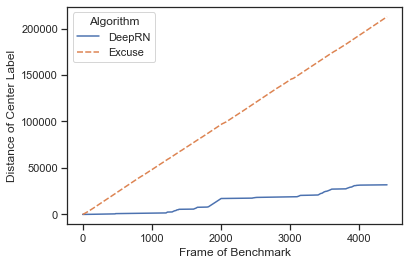

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(style="darkgrid")
sns.set_theme(style="ticks")

# Load an example dataset with long-form data
# fmri = sns.load_dataset("fmri")

sns_plot = sns.lineplot(data=data, x="Frame of Benchmark", y="Distance of Center Label", hue="Algorithm", style="Algorithm")
fig = sns_plot.get_figure()

fig.savefig('graph_DeepRN_Excuse.eps', format='eps', dpi=1200, bbox_inches='tight')